# Final Project- EDA Notebook

## Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

## Load data

In [2]:
# Load aggressiveness dataset
train_data = pd.read_csv('../../data/release-files/eng/trac2_eng_train.csv')
dev_data = pd.read_csv('../../data/release-files/eng/trac2_eng_dev.csv')

# test data data and labels is in separate files, potentially desorganized
test_data = pd.read_csv('../../data/release-files/test/trac2_eng_test.csv')
test_labels_a = pd.read_csv('../../data/release-files/gold/trac2_eng_gold_a.csv')
test_labels_b = pd.read_csv('../../data/release-files/gold/trac2_eng_gold_b.csv')

In [3]:
# Load datasets with gender data (RTGender corpus)
# Some of them are too big (the two from facebook) and the kernel dies trying to read them -> fixed using a gcloud notebook instance

# reddit data
reddit_posts = pd.read_csv('../../data/rtgender/reddit_posts.csv')
reddit_responses = pd.read_csv('../../data/rtgender/reddit_responses.csv')

# fitocracy data
fitocracy_posts = pd.read_csv('../../data/rtgender/fitocracy_posts.csv')
fitocracy_responses = pd.read_csv('../../data/rtgender/fitocracy_responses.csv')

# ted data
ted_responses = pd.read_csv('../../data/rtgender/ted_responses.csv')

# facebook congress
fb_congress_posts = pd.read_csv('../../data/rtgender/facebook_congress_posts.csv')
fb_congress_responses = pd.read_csv('../../data/rtgender/facebook_congress_responses.csv')

# facebook wiki 
fb_wiki_posts = pd.read_csv('../../data/rtgender/facebook_wiki_posts.csv')
fb_wiki_responses = pd.read_csv('../../data/rtgender/facebook_wiki_responses.csv')


In [4]:
## labeled dataset of the RTGender corpus
rt_gender = pd.read_csv('../../data/rtgender/annotations.csv')

## Helper Functions
Functions to help in the process of exploring multiple datasets.


In [5]:
def explore_dataset(df, text_column=None):
    '''
    Returns dataframe general characteristics and text statistics.
    Parameters:
    df: dataframe
    text_column: name of the column that contains the posts (string)
    '''
    # print dataset dimensions of dataframe
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    
    # print columns names
    print(f'Columns:{list(df.columns)}')
    
    if text_column != None:
    # create a column with lenght of text
        df['text_lenght'] = df[text_column].apply(lambda x: len(str(x).split()))

        # get statistics of lenght of the text
        min_words = df['text_lenght'].min()
        max_words = df['text_lenght'].max()
        mean_words = round(df['text_lenght'].mean(), 2) 
        print(f'Minimum number of words per post: {min_words}')
        print(f'Maximum number of words per post: {max_words}')
        print(f'Mean number of words per post: {mean_words}')
        

In [6]:
def plot_text_lenght(df, name):
    '''Creates a histogram.
    Parameters:
    df: dataframe
    name: name for the plot (string)
    '''
    plt.hist(df['text_lenght'], bins=20, facecolor='grey', alpha=0.7)
    plt.title(f'Text lenght histogram for {name}')
    plt.show()
    

In [7]:
def cat_distribution(df, cat_column):
    '''
    Returns the count and percentage per category in a dataframe categorical column.
    Parameters:
    df: dataframe
    cat_column: name of the categorical (string)
    '''
    by_cat_count = pd.DataFrame(df.groupby(cat_column)[cat_column].count())
    by_cat_count = by_cat_count.rename(columns={cat_column:'count'}).reset_index()
    by_cat_count['percentage'] = round((by_cat_count['count'] / by_cat_count['count'].sum())*100,2)
    
    return by_cat_count

## Aggressiveness dataset

### General aspects of the data

Get an idea of the dimensions of the dataframes and the length of the text in each post.

In [8]:
# Inspect training data
train_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C45.451,Next part,NAG,NGEN
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN


In [9]:
# get statistics using helper function
explore_dataset(train_data,'Text')

Number of rows: 4263
Number of columns: 4
Columns:['ID', 'Text', 'Sub-task A', 'Sub-task B']
Minimum number of words per post: 1
Maximum number of words per post: 806
Mean number of words per post: 17.23


In [10]:
# Inspect development data
dev_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C7.2589,U deserve more subscribers. U really great.,NAG,NGEN
1,C68.872,Nice video....,NAG,NGEN
2,C36.762,sorry if i bother somebody.. iam a defence asp...,NAG,GEN
3,C4.1540.1,Joker was amazing....it was not glamorised !.....,NAG,NGEN
4,C59.68,Nice baro,NAG,NGEN


In [11]:
# get statistics using helper function
explore_dataset(dev_data,'Text')

Number of rows: 1066
Number of columns: 4
Columns:['ID', 'Text', 'Sub-task A', 'Sub-task B']
Minimum number of words per post: 1
Maximum number of words per post: 457
Mean number of words per post: 17.52


In [12]:
# inspect test data
test_data.head()

,ID,Text
0,YoutubeCorpus37,https://www.youtube.com/watch?v=4iejjszkflo
1,C37.1,shame on society & culture trying to justify t...
2,C37.2,"just wanna say, there is no gay gene. you can ..."
3,C37.3,"well, if a one twin struggles with self confid..."
4,C37.4,i am an identical twin and we are both homosex...


In [13]:
# get statistics using helper function
explore_dataset(test_data,'Text')

Number of rows: 1200
Number of columns: 2
Columns:['ID', 'Text']
Minimum number of words per post: 1
Maximum number of words per post: 1390
Mean number of words per post: 39.68


In [14]:
# inspect test labels for track a
test_labels_a.head()

,ID,Sub-task A
0,YoutubeCorpus37,NAG
1,C37.1,NAG
2,C37.2,NAG
3,C37.3,NAG
4,C37.4,NAG


In [15]:
# inspect test labels for track b
test_labels_b.head()

,ID,Sub-task B
0,YoutubeCorpus37,NGEN
1,C37.1,NGEN
2,C37.2,NGEN
3,C37.3,NGEN
4,C37.4,NGEN


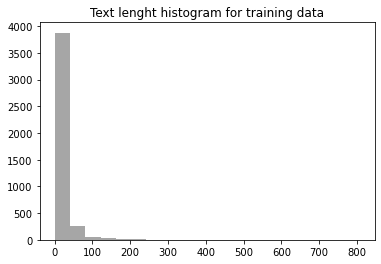

In [16]:
plot_text_lenght(train_data, 'training data')

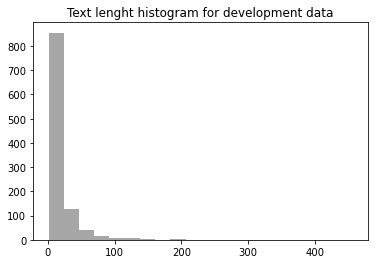

In [17]:
plot_text_lenght(dev_data, 'development data')

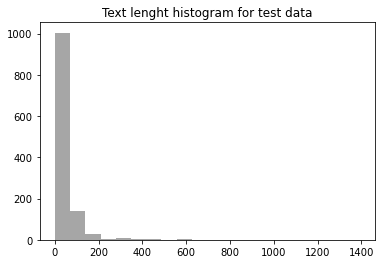

In [18]:
plot_text_lenght(test_data, 'test data')

- Training data: The lenght of the text is highly skewed, with a mean of ~17 words, a minimum of 1 word and a maximum of 806.
- Development data: The lenght of the text is also highly skewed, with a mean of ~17 words, a minimum of 1 word and a maximum of 457.
- Test data: The lenght of the text is also highly skewed, with a mean of ~40 words, a minimum of 1 word and a maximum of 1390. The test dataset seems to have longer text.

### Labels

The classes are imbalanced. 

- For task A- About 80% of the data is composed by non-aggresive comments.
- For task B- About 93% of the data is composed by non-aggresive comments.

For the purpose of the project we will focus on the task A. Identify aggressiveness in posts.

In [19]:
# Explore the label distribution for the sub-task A

cat_distribution(train_data,'Sub-task A')

,Sub-task A,count,percentage
0,CAG,453,10.63
1,NAG,3375,79.17
2,OAG,435,10.20


In [20]:
cat_distribution(dev_data,'Sub-task A')

,Sub-task A,count,percentage
0,CAG,117,10.98
1,NAG,836,78.42
2,OAG,113,10.60


In [21]:
cat_distribution(train_data,'Sub-task B')

,Sub-task B,count,percentage
0,GEN,309,7.25
1,NGEN,3954,92.75


In [22]:
cat_distribution(dev_data,'Sub-task B')

,Sub-task B,count,percentage
0,GEN,73,6.85
1,NGEN,993,93.15


## Datasets with gender data in posts and responses

This is the RTGender corpus. It is composed by data from facebook, reddit, ted and fitocracy (Paper: https://github.com/ipietri/w266_Final_Project/blob/master/papers/RtGender-A%20Corpus%20for%20Studying%20Differential%20Responses%20to%20Gender.pdf)

The authors invested a lot of time scrapping data and assigning gender to posts.

We need to see how we are going to build our dataset based on these datasets. 

We could also add other dataset with gender data if we find any of interest (maybe we could focus only on 3-4 platforms?)


### Reddit dataset

In [23]:
reddit_posts.head()

,op_id,op_gender,post_id,post_text,subreddit,op_gender_visible
0,Kastoli,M,0,slayer task perhaps?,2007scape,False
1,Kastoli,M,1,"Black DHide legs, possibly an initiate pure?",2007scape,False
2,DCBizzle,M,2,Whats a tonk? lol,2007scape,False
3,ordona,M,3,Do the Stronghold of Security for a free 10k t...,2007scape,False
4,SlayerMaster,M,4,I cant tell if this guy just doesnt speak Engl...,2007scape,False


In [24]:
reddit_responses.head()

,op_id,op_gender,post_id,responder_id,response_text,subreddit,responder_gender,responder_gender_visible
0,Kastoli,M,0,Thunda_Storm,or low level. I mean hes wearing black armour ...,2007scape,NaN,unknown_gender
1,Kastoli,M,1,Thunda_Storm,So... Low level,2007scape,NaN,unknown_gender
2,DCBizzle,M,2,minixmatt,"<link> TONK, TONK",2007scape,NaN,unknown_gender
3,ordona,M,3,Namiweso,Thanks I forgot about that place! :),2007scape,NaN,unknown_gender
4,SlayerMaster,M,4,Quantization,Or hes just trolling.,2007scape,NaN,unknown_gender


In [25]:
explore_dataset(reddit_posts, 'post_text')

Number of rows: 1453512
Number of columns: 6
Columns:['op_id', 'op_gender', 'post_id', 'post_text', 'subreddit', 'op_gender_visible']
Minimum number of words per post: 1
Maximum number of words per post: 2050
Mean number of words per post: 36.61


In [26]:
explore_dataset(reddit_responses,'response_text')

Number of rows: 1453512
Number of columns: 8
Columns:['op_id', 'op_gender', 'post_id', 'responder_id', 'response_text', 'subreddit', 'responder_gender', 'responder_gender_visible']
Minimum number of words per post: 1
Maximum number of words per post: 2595
Mean number of words per post: 30.64


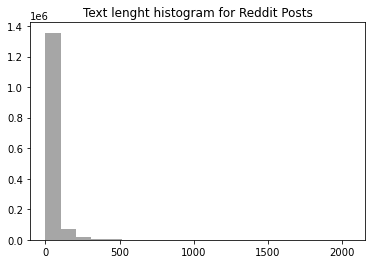

In [27]:
plot_text_lenght(reddit_posts, 'Reddit Posts')

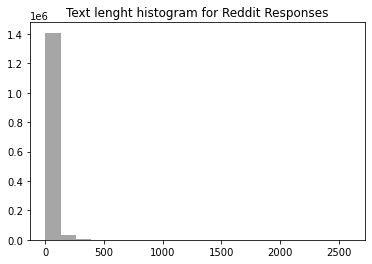

In [28]:
plot_text_lenght(reddit_responses, 'Reddit Responses')

In [29]:
# number of women/men posts. Men post more.
cat_distribution(reddit_responses, 'op_gender')

,op_gender,count,percentage
0,M,1148591,79.02
1,W,304921,20.98


### Fitocracy dataset

In [30]:
fitocracy_posts.head()

,op_id,op_gender,post_id,post_text
0,102,W,0,Thanks for the follow! I followed back :) I ...
1,104,W,1,I've decided I have this crazy goal of running...
2,104,W,2,"Umm, yeah, so those are assisted pull-ups. Bef..."
3,117,M,3,dam gurl lookin mad tone in dat pp holla bb
4,117,M,4,What's up there bear mode?


In [31]:
fitocracy_responses.head()

,op_id,op_gender,post_id,responder_id,response_text,responder_gender
0,102,W,0,1196122,One day at a time! =],M
1,104,W,1,5867,Crazy is synonymous with awesome in this case.,W
2,104,W,2,1635,You can enter assisted pullups. Select pullups...,M
3,117,M,3,8520,"Mirin 3% bodyfat? Yeah, you are.",W
4,117,M,4,29126,"Hey! I just started a new job, so things are s...",M


In [32]:
explore_dataset(fitocracy_posts, 'post_text')

Number of rows: 318535
Number of columns: 4
Columns:['op_id', 'op_gender', 'post_id', 'post_text']
Minimum number of words per post: 1
Maximum number of words per post: 777
Mean number of words per post: 14.62


In [33]:
explore_dataset(fitocracy_responses, 'response_text')

Number of rows: 318535
Number of columns: 6
Columns:['op_id', 'op_gender', 'post_id', 'responder_id', 'response_text', 'responder_gender']
Minimum number of words per post: 1
Maximum number of words per post: 829
Mean number of words per post: 20.74


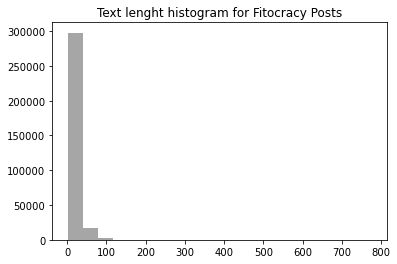

In [34]:
plot_text_lenght(fitocracy_posts, 'Fitocracy Posts')

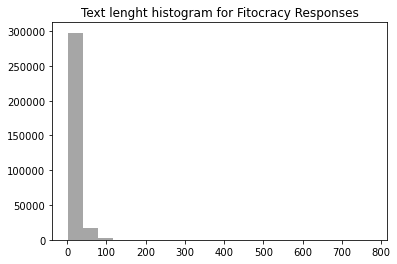

In [35]:
plot_text_lenght(fitocracy_posts, 'Fitocracy Responses')

In [36]:
# number of women/men posts. Much more balanced ~50/50
cat_distribution(fitocracy_responses, 'op_gender')

,op_gender,count,percentage
0,M,173738,54.54
1,W,144797,45.46


### TED dataset

In [37]:
ted_responses.head()

,op_id,op_gender,post_id,responder_id,response_text
0,Aimee Mullins,W,0,Laura,"She seems like a truly amazing person, regardl..."
1,Aimee Mullins,W,1,Ellen,"Aimee's true ""disability"" is when people treat..."
2,Aimee Mullins,W,2,Tanya,I love that she took away some of the mystery ...
3,Aimee Mullins,W,3,Salim,VERY inspiring indeed! I love these TED antiqu...
4,Aimee Mullins,W,4,Kiruba,We take running so much for granted that most ...


In [38]:
explore_dataset(ted_responses, 'response_text')

Number of rows: 190414
Number of columns: 5
Columns:['op_id', 'op_gender', 'post_id', 'responder_id', 'response_text']
Minimum number of words per post: 1
Maximum number of words per post: 3212
Mean number of words per post: 81.68


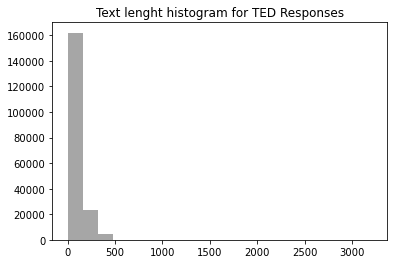

In [39]:
plot_text_lenght(ted_responses, 'TED Responses')

In [40]:
# number of women/men posts. More men post (or give talks)
cat_distribution(ted_responses, 'op_gender')

,op_gender,count,percentage
0,M,144336,75.83
1,W,46011,24.17


### Facebook Congress dataset

In [41]:
fb_congress_posts.head()

,op_id,op_gender,post_id,post_text,post_type
0,57265377,M,0,"Yesterday, my colleagues and I voted to protec...",video
1,57265377,M,1,Roses are red...and so is Texas. Let's keep it...,video
2,57265377,M,2,#TBT to this classic video. #DonkeyWhisperer,video
3,57265377,M,3,Since President Donald J. Trump was sworn in o...,video
4,57265377,M,4,Remembering our 40th president today. LIKE to ...,video


In [42]:
fb_congress_responses.head()

,op_id,op_gender,post_id,responder_id,response_text,op_name,op_category
0,57265377,M,0,Jerry,Protecting birth is not the same as protecting...,Roger Williams,Congress_Republican
1,57265377,M,0,Andrea,You need to protect children and leave my body...,Roger Williams,Congress_Republican
2,57265377,M,0,Sherry,Thank you,Roger Williams,Congress_Republican
3,57265377,M,0,Bob,Thank you Roger,Roger Williams,Congress_Republican
4,57265377,M,0,Joy,Unwanted pregnancy is a sad and unfortunate si...,Roger Williams,Congress_Republican


In [43]:
explore_dataset(fb_congress_posts, 'post_text')

Number of rows: 548341
Number of columns: 5
Columns:['op_id', 'op_gender', 'post_id', 'post_text', 'post_type']
Minimum number of words per post: 1
Maximum number of words per post: 3080
Mean number of words per post: 39.99


In [44]:
explore_dataset(fb_congress_responses, 'response_text')

Number of rows: 13866507
Number of columns: 7
Columns:['op_id', 'op_gender', 'post_id', 'responder_id', 'response_text', 'op_name', 'op_category']
Minimum number of words per post: 1
Maximum number of words per post: 8777
Mean number of words per post: 27.12


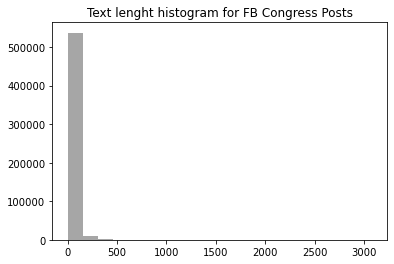

In [45]:
plot_text_lenght(fb_congress_posts, 'FB Congress Posts')

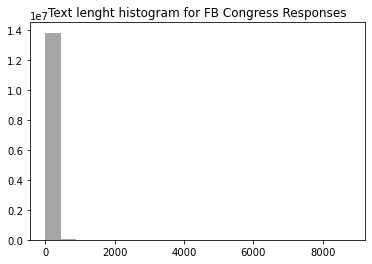

In [46]:
plot_text_lenght(fb_congress_responses, 'FB Congress Responses')

In [47]:
# number of women/men posts. More men post
cat_distribution(fb_congress_posts, 'op_gender')

,op_gender,count,percentage
0,M,413011,75.32
1,W,135330,24.68


In [48]:
# type of posts
cat_distribution(fb_congress_posts, 'post_type')

,post_type,count,percentage
0,event,3417,0.62
1,link,210499,38.39
2,music,278,0.05
3,note,261,0.05
4,photo,199123,36.31
5,status,87921,16.03
6,video,46842,8.54


In [49]:
# party of posts
cat_distribution(fb_congress_responses, 'op_category')

,op_category,count,percentage
0,Congress_Democratic,4786769,34.52
1,Congress_Independent,193088,1.39
2,Congress_Republican,8886650,64.09


### Facebook Wiki dataset

In [50]:
fb_wiki_posts.head()

,op_id,op_gender,post_id,post_text,post_type
0,11679984,M,0,Tornado watch in effect tonight. Be safe. Plea...,photo
1,11679984,M,1,NaN,photo
2,11679984,M,2,Temps warming up for the holiday weekend! I wi...,photo
3,11679984,M,3,Showers heading this way ..,photo
4,11679984,M,4,Storm potential update...feel free to share th...,photo


In [51]:
fb_wiki_responses.head()

,op_id,op_gender,post_id,responder_id,response_text,op_name,op_category
0,11679984,M,0,Michelle,Is this watch going to make it to LaPorte county?,Byron Miranda,Wikipedia_American_television_news_anchors
1,11679984,M,0,Melissa,Anything for Wilmington area,Byron Miranda,Wikipedia_American_television_news_anchors
2,11679984,M,0,Darlene,"Thanks, please keep us posted.",Byron Miranda,Wikipedia_American_television_news_anchors
3,11679984,M,0,Cheryl,Thanks Byron,Byron Miranda,Wikipedia_American_television_news_anchors
4,11679984,M,0,Melissa,[[STICKER]],Byron Miranda,Wikipedia_American_television_news_anchors


In [52]:
explore_dataset(fb_wiki_posts, 'post_text')

Number of rows: 149448
Number of columns: 5
Columns:['op_id', 'op_gender', 'post_id', 'post_text', 'post_type']
Minimum number of words per post: 1
Maximum number of words per post: 4533
Mean number of words per post: 23.77


In [53]:
explore_dataset(fb_wiki_responses, 'response_text')

Number of rows: 10667500
Number of columns: 7
Columns:['op_id', 'op_gender', 'post_id', 'responder_id', 'response_text', 'op_name', 'op_category']
Minimum number of words per post: 1
Maximum number of words per post: 2491
Mean number of words per post: 11.6


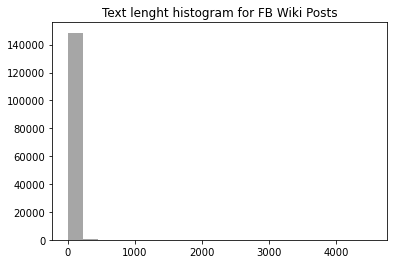

In [54]:
plot_text_lenght(fb_wiki_posts, 'FB Wiki Posts')

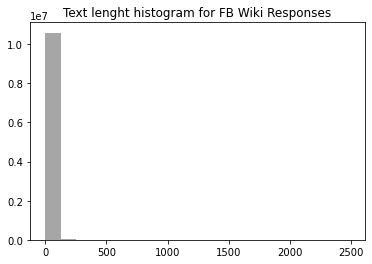

In [55]:
plot_text_lenght(fb_wiki_responses, 'FB Wiki Responses')

In [56]:
# number of women/men posts. More women post !
cat_distribution(fb_wiki_posts, 'op_gender')

,op_gender,count,percentage
0,M,49756,33.29
1,W,99692,66.71


In [57]:
# type of posts
cat_distribution(fb_wiki_posts, 'post_type')

,post_type,count,percentage
0,event,859,0.57
1,link,37609,25.17
2,music,16,0.01
3,note,32,0.02
4,photo,61411,41.09
5,status,33495,22.41
6,video,16026,10.72


In [58]:
# categories of people that post
cat_distribution(fb_wiki_responses, 'op_category')

,op_category,count,percentage
0,Wikipedia_21st-century_American_novelists,131467,1.23
1,Wikipedia_American_female_tennis_players,866343,8.12
2,Wikipedia_American_film_actresses,2689280,25.21
3,Wikipedia_American_male_film_actors,405185,3.80
4,Wikipedia_American_male_television_actors,1270247,11.91
5,Wikipedia_American_male_tennis_players,29426,0.28
6,Wikipedia_American_television_actresses,1605001,15.05
7,Wikipedia_American_television_journalists,336403,3.15
8,Wikipedia_American_television_news_anchors,1556393,14.59
9,Wikipedia_American_television_talk_show_hosts,1534354,14.38


### RTGender labeled dataset 

This is the part of the dataset that they labeled with sentiment data. I don't think we need this part.


In [59]:
rt_gender.head(10)

,source,op_gender,post_text,response_text,sentiment,relevance
0,facebook_wiki,W,Stopped by Fashion Week and got to hang with A...,You are Both Sweet Ashley Tisdale and Lauren C...,Positive,Poster
1,facebook_wiki,M,"Well guys, real progress is happening. I'm 50 ...",Give us the first page to read. ONE PAGE.,Mixed,Content
2,facebook_wiki,W,Tonight is going to be a good night #PerfectMo...,this is my city was there 2 weeks a go,Neutral,Content
3,facebook_wiki,M,I know grandma Gilmore is real proud of you ht...,if grizzly Adams had a beard.,Neutral,Content
4,facebook_wiki,W,#NEWS to KNOW this AM - Mayor Emanuel will mak...,"Good morning Lourdes, have a great day! Great ...",Positive,Irrelevant
5,facebook_wiki,M,What questions do you have for Alisyn Camerota...,Question: Would you invite me up to have a bes...,Neutral,Content
6,facebook_wiki,W,"Into the quarters tomorrow! Won today 6-2,6-3!",awesome! Keep up the good work,Positive,Content
7,facebook_wiki,W,"Fed Cup, ITF Pro Circuit WTA Kristina Mladenov...",Quelle belle poque. Mary tu as berc toute ma j...,Neutral,Content
8,facebook_wiki,W,Thanks everyone!! Doubles and mixed tomorrow.....,"Good luck, don't over do it. Great win today!",Positive,Content
9,facebook_wiki,W,GOOD Night.... Go to Sleep.... God's Up and He...,Thank you. I've had a very rough couple of wee...,Positive,Content


In [60]:
explore_dataset(rt_gender, 'post_text')

Number of rows: 15352
Number of columns: 6
Columns:['source', 'op_gender', 'post_text', 'response_text', 'sentiment', 'relevance']
Minimum number of words per post: 1
Maximum number of words per post: 64
Mean number of words per post: 18.93


In [61]:
explore_dataset(rt_gender, 'response_text')

Number of rows: 15352
Number of columns: 7
Columns:['source', 'op_gender', 'post_text', 'response_text', 'sentiment', 'relevance', 'text_lenght']
Minimum number of words per post: 1
Maximum number of words per post: 66
Mean number of words per post: 17.49


In [62]:
# number of posts of each platform
cat_distribution(rt_gender, 'source')

,source,count,percentage
0,facebook_congress,4180,27.23
1,facebook_wiki,2884,18.79
2,fitocracy,2904,18.92
3,reddit,2732,17.80
4,ted,2652,17.27
